In [1]:
import cv2
import imghdr
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
labels = ['glioma','notumor','meningioma','pituitary']
for i in labels:
    folderPath = os.path.join('E:/anamika_maam/brain/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('E:/anamika_maam/brain/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [3]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(7022, 224, 224, 3)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.3,random_state=45)

In [5]:

train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
train.fit(X_train)



In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [7]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
from tensorflow.keras.layers import *

resnet_model=tf.keras.applications.ResNet152V2(include_top=False,weights=None,input_tensor=None,input_shape=(249, 249, 3))

for l in resnet_model.layers:
# Freezing the model
  l.trainable = False

In [14]:
resnet_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 249, 249, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 255, 255, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 63, 63, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 63, 63, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 63, 63, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 32, 32, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                 ]                                
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 34, 34, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
          

 conv3_block7_out (Add)         (None, 32, 32, 512)  0           ['conv3_block6_out[0][0]',       
                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 32, 32, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 32, 32, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 32, 32, 128)  65536       ['conv3_block8_preact_relu[0][0]'
          

                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 18, 18, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

                                )                                 'conv4_block4_3_conv[0][0]']    
                                                                                                  
 conv4_block5_preact_bn (BatchN  (None, 16, 16, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 16, 16, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
          

                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 16, 16, 256)  589824      ['conv4_block7_2_pad[0][0]']     
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block7_2_relu[0][0]']    
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block10_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
          

 conv4_block12_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 16, 16, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block12_out[0][0]']      
 Normaliza

 lization)                                                                                        
                                                                                                  
 conv4_block15_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block17_out (Add)        (None, 16, 16, 1024  0           ['conv4_block16_out[0][0]',      
                                )                                 'conv4_block17_3_conv[0][0]']   
                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block18_preact_relu[0][0]
          

 ng2D)                                                                                            
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block23_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block23_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block25_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block25_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 16, 16, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block28_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block28_2_pad[0][0]']    
          

                                                                                                  
 conv4_block30_out (Add)        (None, 16, 16, 1024  0           ['conv4_block29_out[0][0]',      
                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_blo

 conv4_block33_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block33_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block36_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 8, 8, 512)    2359296     ['conv5_block2_2_pad[0][0]']     
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 8, 8, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
          

In [9]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [10]:
from tensorflow.keras.models import *
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(resnet_model)
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(lr=3e-5) ,metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 71,177,348
Trainable params: 12,845,700
No

C:\Users\Umesh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
history = model.fit(train.flow(X_train, y_train, batch_size=64,
         subset='training'),validation_data=train.flow(X_train, y_train,
         batch_size=16, subset='validation'), epochs=50,  callbacks=[tensorboard_callback])


Epoch 1/50
62/62 [==============================] - 197s 3s/step - loss: 0.8097 - accuracy: 0.7424 - val_loss: 0.2998 - val_accuracy: 0.8901
Epoch 2/50
62/62 [==============================] - 168s 3s/step - loss: 0.2363 - accuracy: 0.9110 - val_loss: 0.2122 - val_accuracy: 0.9207
Epoch 3/50
62/62 [==============================] - 172s 3s/step - loss: 0.1515 - accuracy: 0.9440 - val_loss: 0.1704 - val_accuracy: 0.9390
Epoch 4/50
62/62 [==============================] - 166s 3s/step - loss: 0.0857 - accuracy: 0.9672 - val_loss: 0.1603 - val_accuracy: 0.9471
Epoch 5/50
62/62 [==============================] - 49s 762ms/step - loss: 0.0659 - accuracy: 0.9781 - val_loss: 0.1622 - val_accuracy: 0.9400
Epoch 6/50
62/62 [==============================] - 45s 731ms/step - loss: 0.0461 - accuracy: 0.9835 - val_loss: 0.1431 - val_accuracy: 0.9512
Epoch 7/50
62/62 [==============================] - 50s 809ms/step - loss: 0.0315 - accuracy: 0.9908 - val_loss: 0.1550 - val_accuracy: 0.9522
Epoch 8

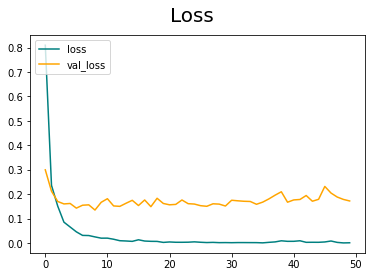

In [13]:
# Plot the loss  curves for training and validation 
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

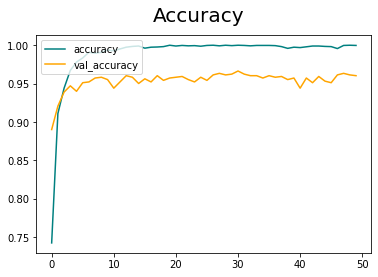

In [14]:
# Plot the loss  accuracy for training and validation 
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [15]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','resnet_model.h5'))

In [16]:
from tensorflow.keras.models import load_model
resnet_model = load_model('models/resnet_model.h5')

In [17]:
X_test = X_test/255

score_cnn = resnet_model.evaluate(X_test,y_test)

print('Test loss:', score_cnn[0]) 
print('Test accuracy:', score_cnn[1])

66/66 [==============================] - 19s 228ms/step - loss: 0.1892 - accuracy: 0.9639
Test loss: 0.189237579703331
Test accuracy: 0.9639297723770142


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.cm as cm

from sklearn.metrics import classification_report, confusion_matrix

In [19]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (12, 12), fontsize=14):
    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix.flatten() / np.sum(confusion_matrix)]

    labels = [f"{v2}\n{v3}" for v2, v3 in
              zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(class_names), len(class_names))

    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')

    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    return fig

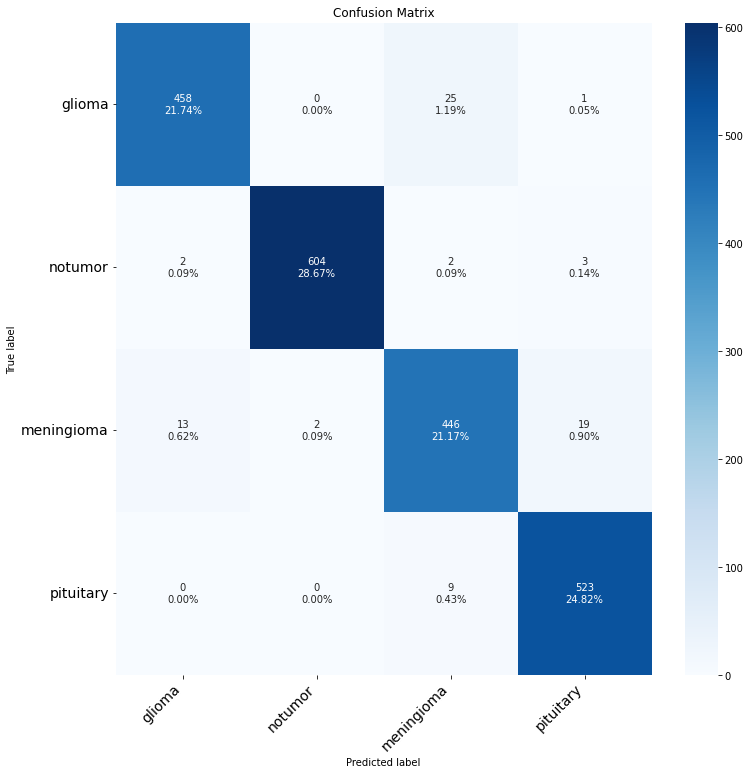

In [22]:
pred = resnet_model.predict(X_test)
y_test = y_test.argmax(axis=1)

# take the argmax for each set of prediction scores
# to return the class id of the highest confidence prediction
pred_ids = pred.argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_ids)
figure = print_confusion_matrix(conf_mat, labels)
plt.title('Confusion Matrix')
plt.show()

In [23]:
import sklearn.metrics as skm
print("accuracy=",skm.balanced_accuracy_score(y_test, pred_ids))
print("recall/senstivity=",skm.recall_score(y_test, pred_ids,average='weighted'))
print("precision=",skm.precision_score(y_test, pred_ids,average='weighted'))
print("f1_score=",skm.f1_score(y_test, pred_ids,average='weighted'))

accuracy= 0.9617684341728041
recall/senstivity= 0.9639297579496915
precision= 0.964107158198214
f1_score= 0.9639423051785444
